In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
# pio.renderers.default='browser'

In [2]:
dados_vest = pd.read_excel('data/vestibular.xlsx')

In [3]:
# Estrutura do banco de dados

print(dados_vest.info())

# Estatísticas descritivas das variáveis

dados_vest.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudante   5 non-null      object 
 1   matemática  5 non-null      float64
 2   física      5 non-null      float64
 3   química     5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 292.0+ bytes
None


,matemática,física,química
count,5.000000,5.000000,5.000000
mean,6.160000,2.940000,5.460000
std,2.478508,2.918561,3.510413
min,3.400000,1.000000,1.500000
25%,3.700000,1.000000,2.700000
50%,7.000000,2.000000,5.000000
75%,7.800000,2.700000,9.000000
max,8.900000,8.000000,9.100000


In [4]:
# Gráfico 3D das observações

fig = px.scatter_3d(dados_vest, 
                    x='matemática', 
                    y='química', 
                    z='física',
                    text=dados_vest.estudante)
fig.show()

In [5]:
# Padronização por meio do Z-Score

# Muitas vezes, é importante realizar o procedimento Z-Score nas variáveis
# Quando as variáveis estiverem em unidades de medidas ou escalas distintas
# Poderia ser feito da seguinte forma, embora aqui não utilizaremos!

# Selecionado apenas variáveis métricas
vest = dados_vest.drop(columns=['estudante'])

# Aplicando o procedimento de ZScore
vest_pad = vest.apply(zscore, ddof=1)

# Visualizando o resultado do procedimento na média e desvio padrão
print(round(vest_pad.mean(), 2))
print(round(vest_pad.std(), 2))

matemática    0.0
física        0.0
química       0.0
dtype: float64
matemática    1.0
física        1.0
química       1.0
dtype: float64


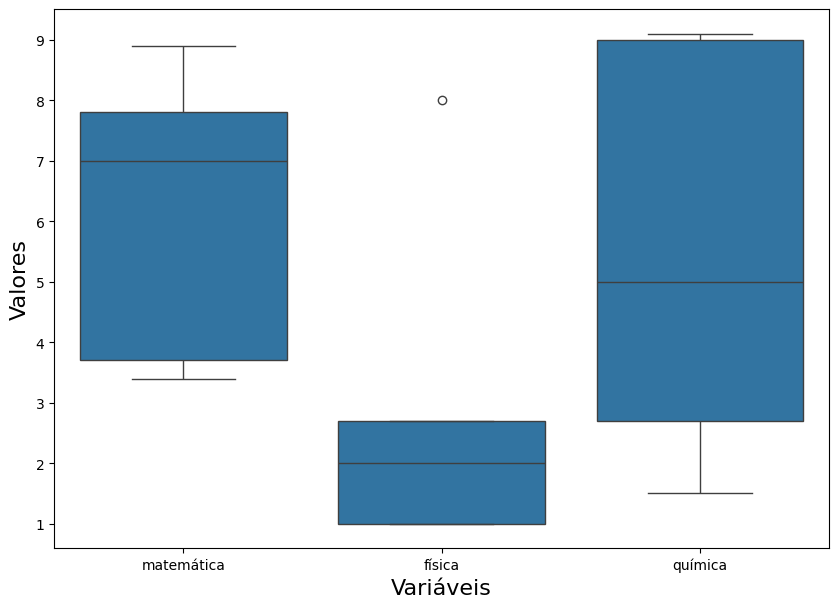

In [6]:
# Boxplot com as três variáveis originais

plt.figure(figsize=(10,7))
sns.boxplot(x='variable', y='value', data=pd.melt(vest))
plt.ylabel('Valores', fontsize=16)
plt.xlabel('Variáveis', fontsize=16)
plt.show()

*O gráfico ilustra que não é necessária a padronização neste caso*

### Cluster hierárquico aglomerativo: distância euclidiana + single linkage

In [7]:
# Visualizando as distâncias
dist_euclidiana = pdist(vest, metric='euclidean')

**Opções para as distâncias ("metric"):**
- euclidean
- sqeuclidean
- cityblock
- chebyshev
- canberra
- correlation

**Opções para o método de encadeamento ("method"):**
- single
- complete
- average

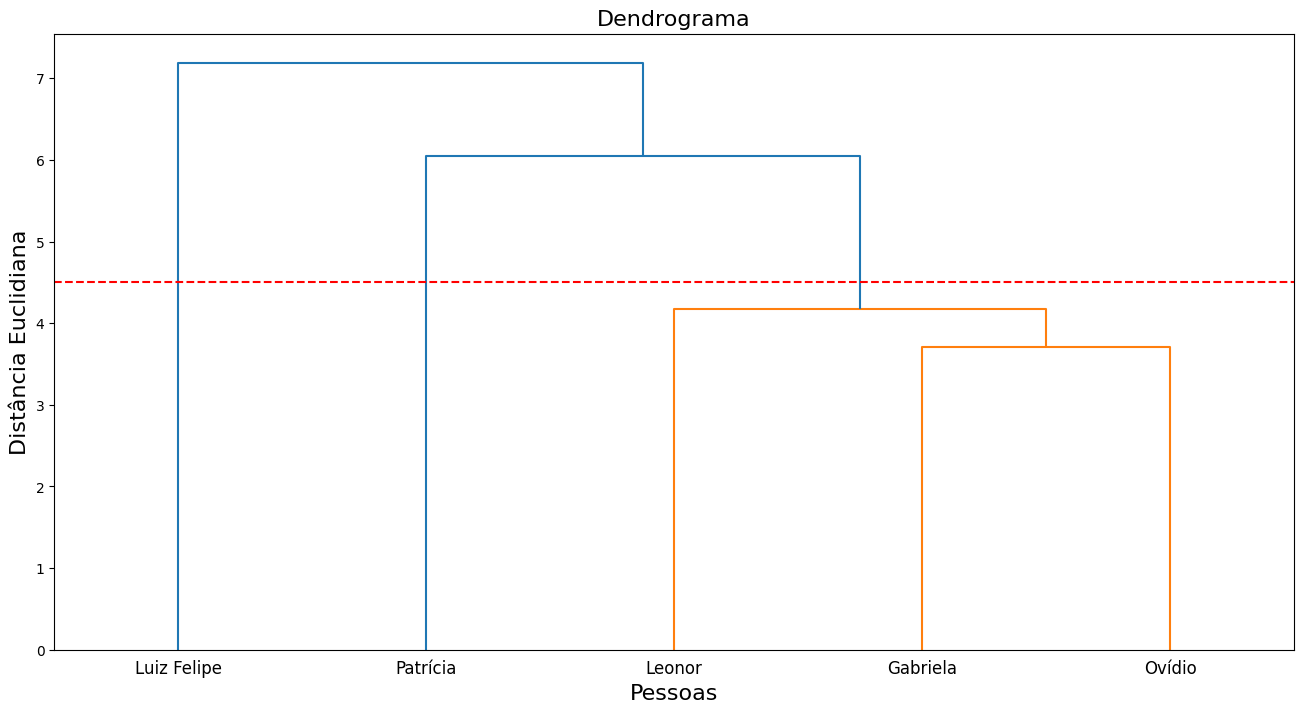

In [8]:
# Gerando o dendrograma
## Distância euclidiana e método de encadeamento single linkage

plt.figure(figsize=(16,8))
dend_sing = sch.linkage(vest, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 4.5, labels = list(dados_vest.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

**Gerando a variável com a indicação do cluster no dataset**

*Deve ser realizada a seguinte parametrização:*
- Número de clusters (n_clusters)
- Medida de distância (metric)
- Método de encadeamento (linkage)
    
*Como já observamos 3 clusters no dendrograma, vamos selecionar "3" clusters*

*A medida de distância e o método de encadeamento são mantidos*

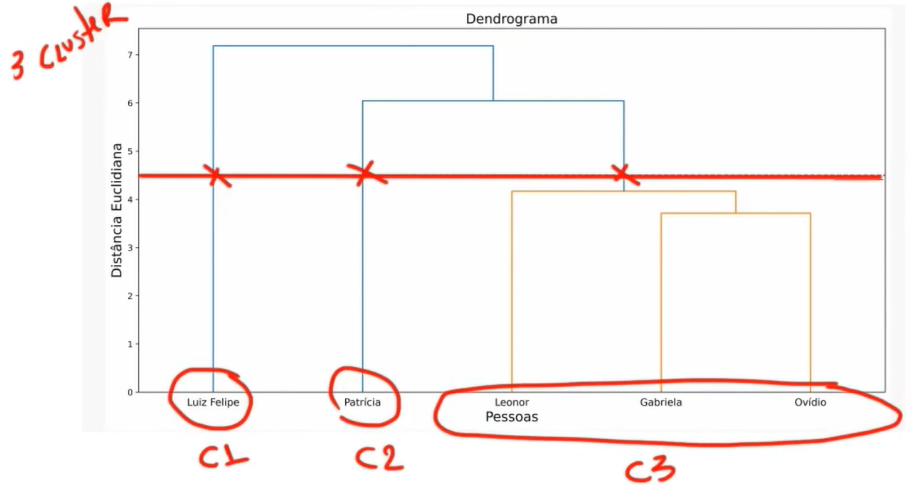

In [9]:
cluster_sing = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(vest)
dados_vest['cluster_single'] = indica_cluster_sing
dados_vest['cluster_single'] = dados_vest['cluster_single'].astype('category')

# Coeficientes do esquema hierárquico de aglomeração (single)
coef_single = [y[1] for y in dendrogram_s['dcoord']]
print(coef_single)

[np.float64(3.713488925525428), np.float64(4.170131892398609), np.float64(6.044832503882965), np.float64(7.1867934435323795)]


### Cluster hierárquico aglomerativo: distância euclidiana + complete linkage

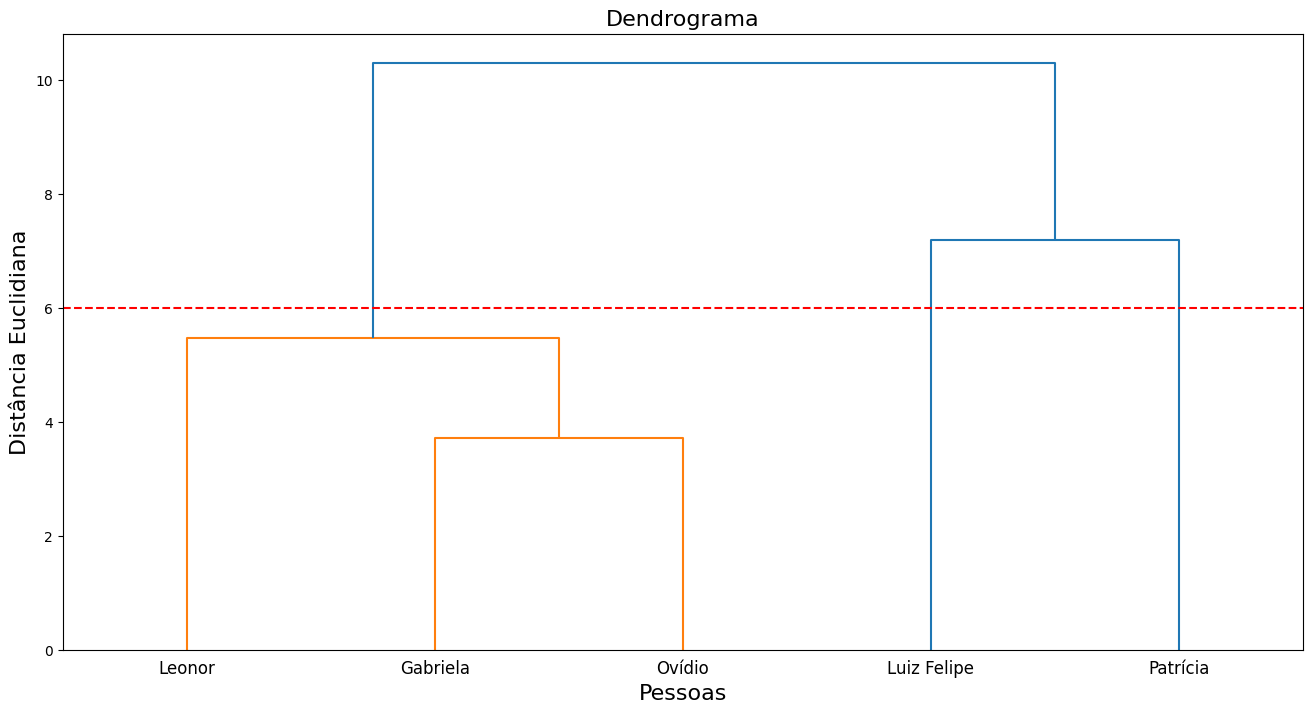

In [10]:
# Gerando o dendrograma
## Distância euclidiana e método de encadeamento complete linkage

plt.figure(figsize=(16,8))
dend_compl = sch.linkage(vest, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 6, labels = list(dados_vest.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()

In [11]:
# Gerando a variável com a indicação do cluster no dataset

cluster_comp = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(vest)
dados_vest['cluster_complete'] = indica_cluster_comp
dados_vest['cluster_complete'] = dados_vest['cluster_complete'].astype('category')

# Coeficientes do esquema hierárquico de aglomeração (complete)
coef_complete = [y[1] for y in dendrogram_c['dcoord']]
print(coef_complete)

[np.float64(3.713488925525428), np.float64(5.473572873361603), np.float64(7.1867934435323795), np.float64(10.290286682109492)]


### Cluster hierárquico aglomerativo: distância euclidiana + average linkage

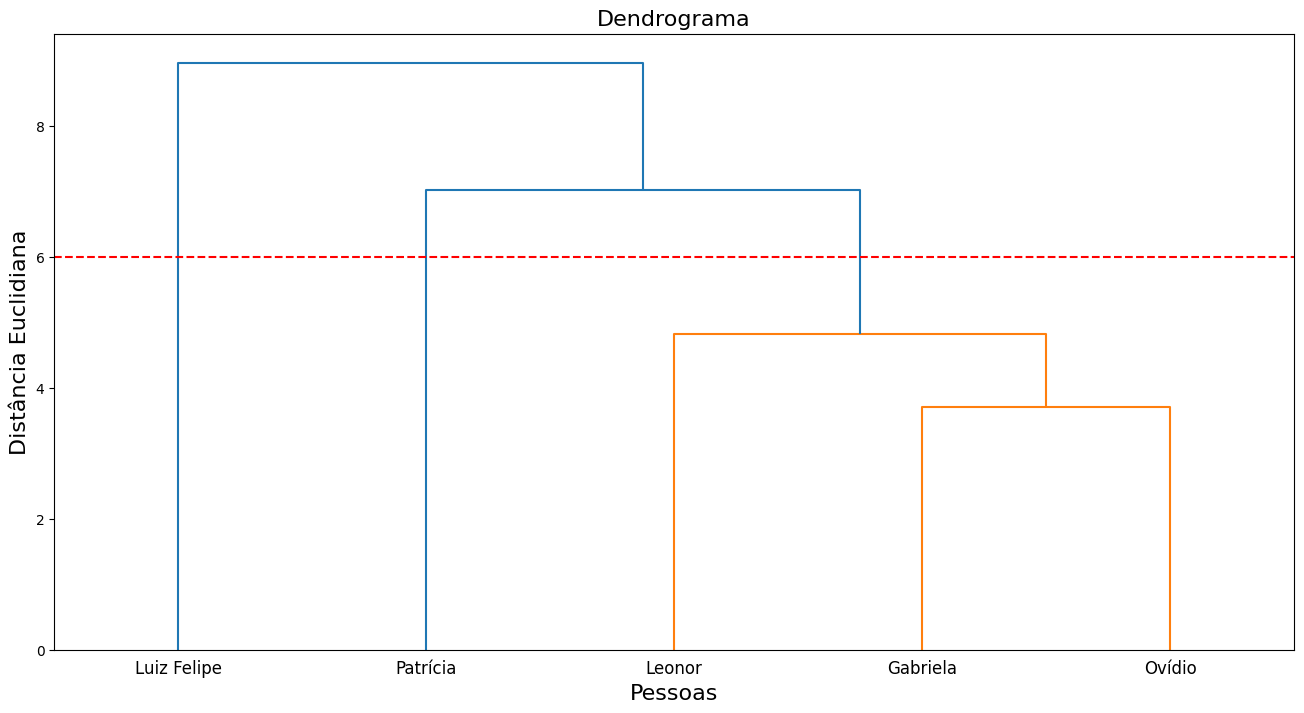

In [12]:
# Gerando o dendrograma
## Distância euclidiana e método de encadeamento average linkage

plt.figure(figsize=(16,8))
dend_avg = sch.linkage(vest, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg, color_threshold = 6, labels = list(dados_vest.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()

In [13]:
# Gerando a variável com a indicação do cluster no dataset

cluster_avg = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'average')
indica_cluster_avg = cluster_avg.fit_predict(vest)
dados_vest['cluster_average'] = indica_cluster_avg
dados_vest['cluster_average'] = dados_vest['cluster_average'].astype('category')

# Coeficientes do esquema hierárquico de aglomeração (average)
coef_avg = [y[1] for y in dendrogram_a['dcoord']]
print(coef_avg)

[np.float64(3.713488925525428), np.float64(4.821852382880106), np.float64(7.014908666114838), np.float64(8.957934317775708)]


### Cluster Não Hierárquico K-means

In [ ]:
# Considerando que identificamos 3 possíveis clusters na análise hierárquica

kmeans = KMeans(n_clusters=3, init='random', random_state=100).fit(vest)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_
dados_vest['cluster_kmeans'] = kmeans_clusters
dados_vest['cluster_kmeans'] = dados_vest['cluster_kmeans'].astype('category')

In [15]:
# Identificando as coordenadas centroides dos clusters finais

cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = vest.columns
cent_finais.index.name = 'cluster'
cent_finais

,matemática,física,química
cluster,,,
0,8.9,1.0,2.7
1,7.8,8.0,1.5
2,4.7,1.9,7.7


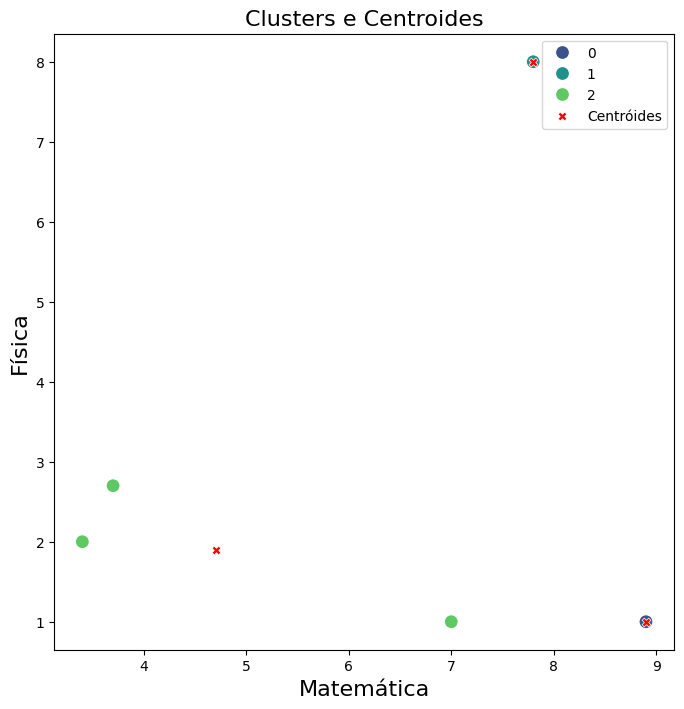

In [16]:
# Plotando as observações e seus centroides dos clusters

plt.figure(figsize=(8,8))
sns.scatterplot(data=dados_vest, x='matemática', y='física', hue='cluster_kmeans', palette='viridis', s=100)
sns.scatterplot(data=cent_finais, x='matemática', y='física', c = 'red', label = 'Centróides', marker="X", s = 40)
plt.title('Clusters e Centroides', fontsize=16)
plt.xlabel('Matemática', fontsize=16)
plt.ylabel('Física', fontsize=16)
plt.legend()
plt.show()

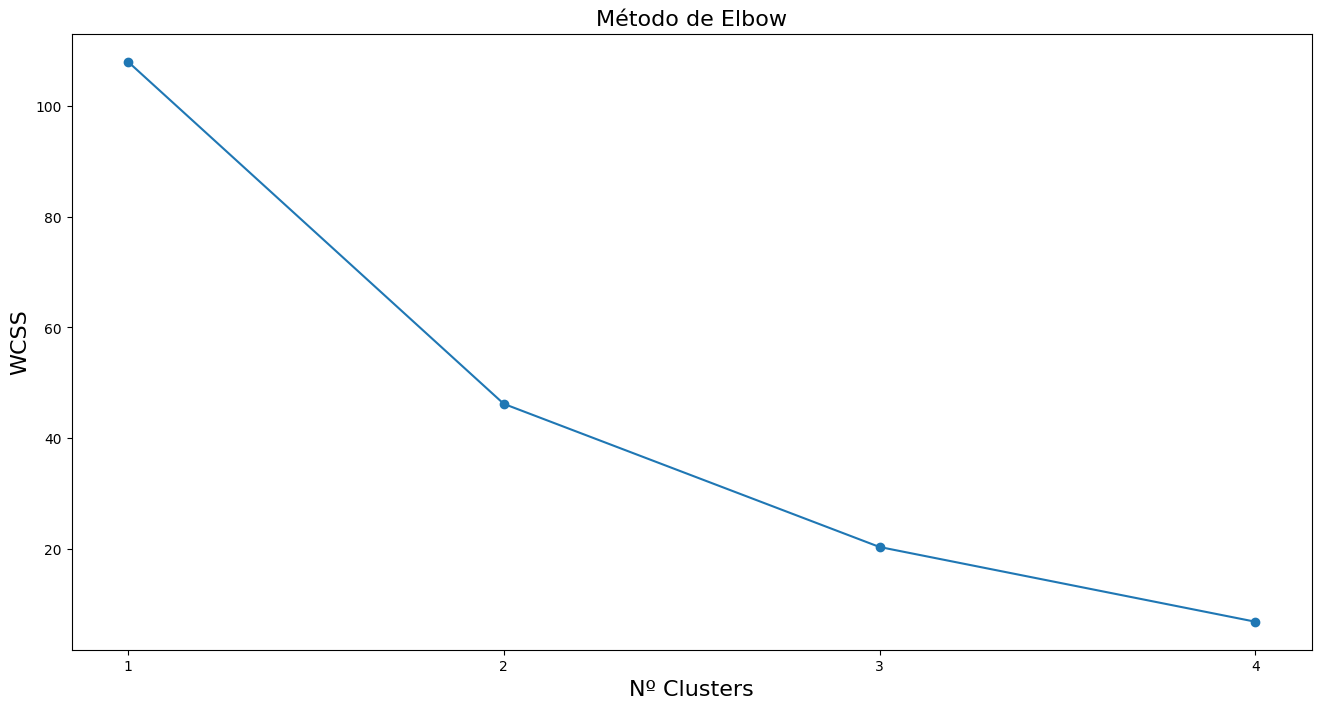

In [17]:
# Identificação da quantidade de clusters

# Método Elbow para identificação do nº de clusters
## Elaborado com base na "WCSS": distância de cada observação para o centroide de seu cluster
## Quanto mais próximos entre si e do centroide, menores as distâncias internas
## Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva "dobra"

elbow = []
K = range(1,5) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(vest)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,5))
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

### Análise de variância de um fator (ANOVA)

**Interpretação do output:**

- cluster_kmeans MS: indica a variabilidade entre grupos
- Within MS: indica a variabilidade dentro dos grupos
- F: estatística de teste (cluster_kmeans MS / Within MS)
- p-unc: p-valor da estatística F
- se p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

In [18]:
# Matemática
pg.anova(dv='matemática', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

# Física
pg.anova(dv='física', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

# Química
pg.anova(dv='química', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

,0,1
Source,cluster_kmeans,Within
SS,38.352,10.94
DF,2,2
MS,19.176,5.47
F,3.505667,NaN
p-unc,0.221943,NaN
np2,0.778057,NaN


- A variável mais discriminante contém a maior estatística F (é significativa)
- O valor da estatística F é sensível ao tamanho da amostra

In [19]:
# Gráfico 3D dos clusters

fig = px.scatter_3d(dados_vest, 
                    x='matemática', 
                    y='química', 
                    z='física',
                    color='cluster_kmeans',
                    text=dados_vest.estudante)
fig.show()